Saving biomasa_consumo_espana (1).csv to biomasa_consumo_espana (1) (4).csv
Saving co2_emisiones_espana (1).csv to co2_emisiones_espana (1) (4).csv


,Año,CO2_Mt,Consumo_Biomasa_Mtep
0,1990,250,5
1,1991,255,6
2,1992,260,7
3,1993,270,8
4,1994,280,9


,Año,CO2_Mt,Consumo_Biomasa_Mtep
11,2005,350,28
12,2010,300,38
13,2015,270,46
14,2020,240,54
15,2023,220,64


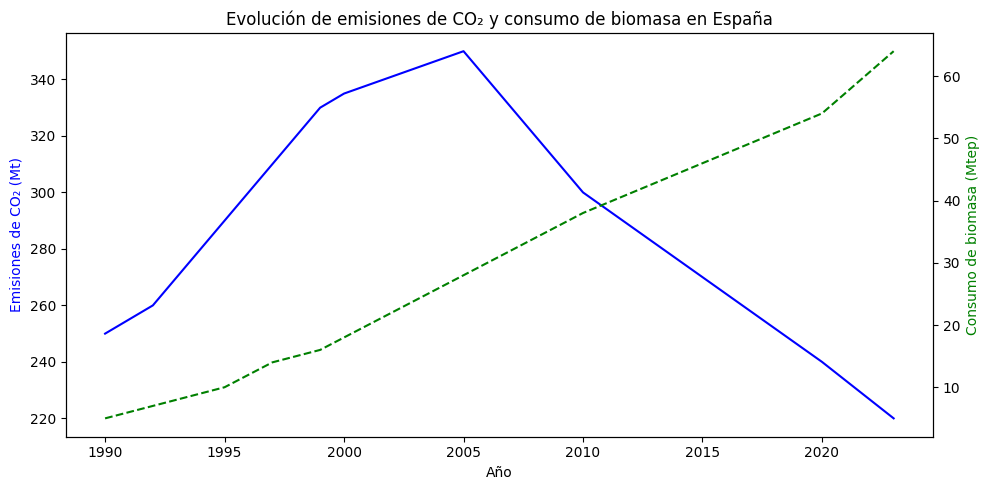

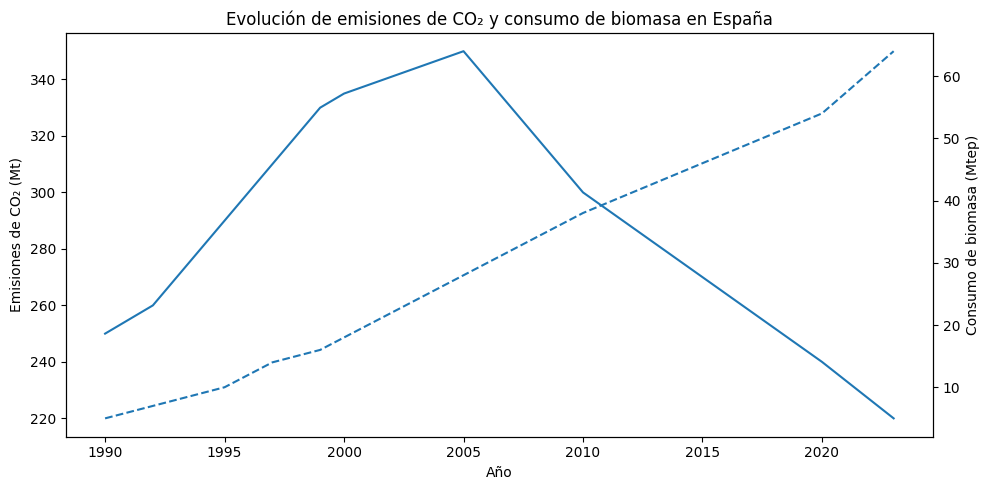

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Subir archivos CSV desde tu ordenador
from google.colab import files
uploaded = files.upload()

import pandas as pd, glob

co2_file = sorted(glob.glob("co2_emisiones_espana*.csv"))[0]
bio_file = sorted(glob.glob("biomasa_consumo_espana*.csv"))[0]

co2 = pd.read_csv(co2_file, sep=None, engine="python")
biomasa = pd.read_csv(bio_file, sep=None, engine="python")

df = pd.merge(co2, biomasa, on="Año", how="inner")
df["Año"] = pd.to_numeric(df["Año"], errors="coerce")
df["CO2_Mt"] = pd.to_numeric(df["CO2_Mt"], errors="coerce")
df["Consumo_Biomasa_Mtep"] = pd.to_numeric(df["Consumo_Biomasa_Mtep"], errors="coerce")
df = df.dropna().sort_values("Año")

display(df.head(), df.tail())
import matplotlib.pyplot as plt

# Gráfico con dos ejes
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(df["Año"], df["CO2_Mt"], color="blue", label="CO₂ (Mt)")
ax1.set_xlabel("Año")
ax1.set_ylabel("Emisiones de CO₂ (Mt)", color="blue")

ax2 = ax1.twinx()
ax2.plot(df["Año"], df["Consumo_Biomasa_Mtep"], color="green", linestyle="--", label="Biomasa (Mtep)")
ax2.set_ylabel("Consumo de biomasa (Mtep)", color="green")

plt.title("Evolución de emisiones de CO₂ y consumo de biomasa en España")
plt.tight_layout()
plt.show()

# (opcional) Forzar modo inline por si acaso
%matplotlib inline

import matplotlib.pyplot as plt

# Gráfico con dos ejes
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(df["Año"], df["CO2_Mt"], label="CO₂ (Mt)")
ax1.set_xlabel("Año")
ax1.set_ylabel("Emisiones de CO₂ (Mt)")

ax2 = ax1.twinx()
ax2.plot(df["Año"], df["Consumo_Biomasa_Mtep"], linestyle="--", label="Biomasa (Mtep)")
ax2.set_ylabel("Consumo de biomasa (Mtep)")

plt.title("Evolución de emisiones de CO₂ y consumo de biomasa en España")
plt.tight_layout()
plt.show()

# Guardar imagen para el informe
fig.savefig("report_fig_01.png", dpi=200, bbox_inches="tight")

